In [31]:
from puromycin import Vt
import numpy as np

In [32]:
Y = Vt[:, 1]
X = Vt[:, 0]

Y, X

(array([ 76.,  47.,  97., 107., 123., 139., 159., 152., 191., 201., 207.,
        200.]),
 array([0.02, 0.02, 0.06, 0.06, 0.11, 0.11, 0.22, 0.22, 0.56, 0.56, 1.1 ,
        1.1 ]))

In [33]:
def model(x, p1, p2):
    return p1*x/(p2+x)

#1/y = (p2+x)/(p1*x)
#1/y = (p2/p1)*1/x + 1/p1

#Linear: y_hatt = beta_1 * x + beta_2
#beta_1 = p2/p1
#beta_2 = 1/p1

def linear_model(x, y):
    y_hatt = 1/y
    x_inv = 1/x
    X_mat = np.array([x_inv, np.ones(len(x))]).T

    XT_T_inv = np.linalg.inv(X_mat.T @ X_mat)
    x_T = X_mat.T
    p = XT_T_inv @ x_T @ y_hatt

    return p

In [34]:
p = linear_model(X,Y)
beta_1, beta_2 = p[0], p[1]

p1 = 1/beta_2
p2 = beta_1*p1

print(f"p1 = {p1}, p2 = {p2}")

p1 = 195.80270884775, p2 = 0.048406533867254124


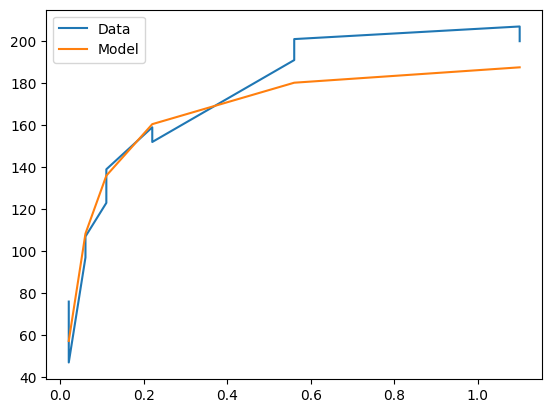

In [38]:
y_values = Y
y_model = [model(x, p1, p2) for x in X]


import matplotlib.pyplot as plt

plt.plot(X, y_values, label="Data")
plt.plot(X, y_model, label="Model")
plt.legend()
plt.show()

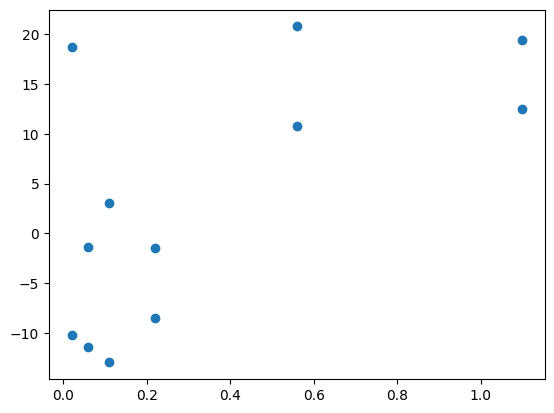

In [40]:
residuals = y_values - y_model

plt.scatter(X, residuals, label="Residuals")
plt.show()


In [ ]:
#TODO

var = np.var(residuals, ddof=2)

step = 1e-6
p1_step = step * p1
p2_step = step * p2

func_true = model(X, p1, p2)
func_step_p1 = model(X, p1_step, p2)
func_step_p2 = model(X, p1, p2_step)

der_p1, der_p2 = (func_step_p1 - func_true)/p1_step, (func_step_p2 - func_true)/p2_step
J = np.column_stack((der_p1, der_p2))
JT_J = J.T @ J

lower, upper = #Confidence intervall